Create a random irregular mask for data generation:
Draw 3 random lines.
Along the lines, choose n points.
Draw circles of random, but continuous radius on these points.

In [223]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import skimage
import os

def load_image_as_np_array(path):
    img = Image.open(path)
    return np.array(img)

def show_image_from_array(array):
    plt.imshow(array)

# Draw a circle of random size    
def create_mask(size_x, size_y, maxLines, maxRad, n=1, blocked_abs=None, blocked_rel=0.05):
    mask = np.ones((size_x, size_y, 4), dtype=int)
    # Determine how many lines should be defined
    lines = np.random.randint(1, maxLines)
    lines *= 2
    
    # Create vector of random numbers
    x = np.random.randint(maxRad+1, size_x - maxRad - 1, lines)
    y = np.random.randint(maxRad+1, size_y - maxRad - 1, lines)
    
    # Make lines
    for i in range(lines):
        if i % 2 == 0:
            row, col = skimage.draw.line(x[i], y[i], x[i+1], y[i+1])
            length = len(row)
            for j in range(length):
                # TODO: find a better function that is more random but smooth
                rand = np.random.randint(0, 10000)
                # Hier können out of bounds-Fehler entstehen
                function = maxRad*np.sin(rand)*2
                upperBound = min(max(function, 5), maxRad)
                radius = np.random.randint(4, upperBound)
                rowCirc, colCirc = skimage.draw.disk((row[j], col[j]), radius)
                mask[rowCirc, colCirc] = np.array([0, 0, 0, 0])
    
    return mask

# TODO: Maybe use bezier_curve() to create more irregularities (paraboloids)

# Source: https://coderzcolumn.com/tutorials/python/how-to-draw-shapes-on-images-using-scikit-image-python
# bezier_curve(r0,c0,r1,c1,r2,c2,weight) - This method takes as input six parameter and returns coordinates of bezier curve created using them.
# The first two parameters (r0,c0) specifies the coordinates of the first control point of the curve.
# The next two parameters (r1,c1) specifies the coordinates of the middle control point of the curve.
# The next two parameters (r2,c2) specifies the coordinates of the last control point of the curve.
# The last weight parameter accepts float value specifying middle control point weight. It's used to describe line tension.

In [224]:
# Navigate to correct folder
# os.getcwd()

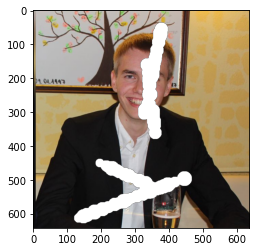

In [235]:
# Print image with mask overlay
img = load_image_as_np_array('test1.png')
maxLines = np.random.randint(2, 16)
maxRad = np.random.randint(5, 24)
mask = create_mask(img.shape[0], img.shape[1], maxLines, maxRad)
mx = np.multiply(img, mask)
show_image_from_array(mx)

# TODO: Algorithmus für große Datenmengen automatisieren